# Import

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs
from collections import defaultdict

# Dataset Preparation

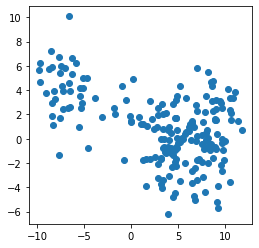

In [ ]:
features, clusters = make_blobs(
    n_samples=200, 
    n_features=2, 
    centers=5, 
    cluster_std=2, 
    shuffle=True
)

plt.figure(figsize=(4, 4))
plt.scatter(features[:, 0], features[:, 1])
plt.show()

# Algorithm Implementation

In [ ]:
class Point: 
    def __init__(self, data):
        self.data = data
        self.cluster = None
        
class KMeans:
    def __init__(self, K, random_seed):
        self.K = K
        self.random_seed = random_seed
        self.centroids = None
        
    def _random_initialization(self, points):
        np.random.seed(self.random_seed)
        for point in points: 
            point.cluster = np.random.randint(0, self.K)
    def _update_centroids(self, points):
        
        point_dict = defaultdict(list)
        for point in points: 
            point_dict[point.cluster] = point_dict[point.cluster] + [point.data]
            
        prev_centroids = self.centroids
        self.centroids = [np.mean(point_dict[k], axis=0) for k in range(self.K)]
        
        for i, c in enumerate(self.centroids): 
            if np.isnan(c).any():
                self.centroids[i] = prev_centroids[i]
        
    def _point_assignment(self, points):
        for point in points: 
            distances = [
                np.linalg.norm(point.data - self.centroids[k])
                for k in range(self.K)
            ]
            point.cluster = np.argmin(distances)
    
    def fit(self, points, iterations=100):
        self._random_initialization(points)
        for _ in range(iterations):
            self._update_centroids(points)
            self._point_assignment(points)
            
    def predict(self, points):
        self._point_assignment(points)
        return [point.cluster for point in points]

In [ ]:
kmeans = KMeans(K=5, random_seed=10)
points = [Point(data) for data in features]
kmeans.fit(points)
predictions = kmeans.predict(points)

# Evaluation

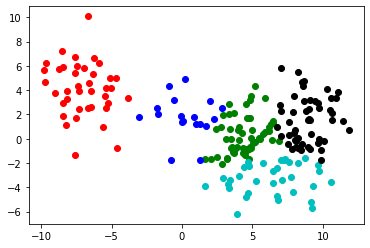

In [ ]:
color_list = ['r', 'g', 'b', 'c', 'k']
for i in range(5):
    plt.scatter(
        features[np.array(predictions)==i, 0], 
        features[np.array(predictions)==i, 1],
        color=color_list[i]
    )
    
plt.show()